In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def loadDataSet(fileName):
    dataMat = []
    with open('testSet.txt','r') as fr:
        for line in fr.readlines():
            curLine = line.strip().split('\t')
            fltLine = list(map(float, curLine)) # 里面是一个个map对象
            dataMat.append(fltLine)
        return dataMat

In [12]:
"""
计算两个向量的欧式距离
"""
def distEclud(vecA, vecB):
    return np.sqrt(np.sum(np.power(vecA - vecB, 2)))
"""
该函数为给定数据集构建一个包含K个随机质心的集合
随机质心必须要在整个数据集的边界之内
"""
def randCent(dataSet, k):
    n = np.shape(dataSet)[1] # 特征维数
    centroids = np.mat(np.zeros((k,n))) # 将array转换成矩阵
    # 找出每一维的最大最小值
    for j in range(n):
        minJ = np.min(dataSet[:,j])
        rangeJ = float(np.max(dataSet[:,j]) - minJ)
        centroids[:, j] = minJ + rangeJ * np.random.rand(k, 1)
    return centroids

In [17]:
dataMat = np.mat(loadDataSet('testSet.txt'))
print('min: ',min(dataMat[:,0]))
print('max: ', max(dataMat[:,0]))
randCent(dataMat, 2)

min:  [[-5.379713]]
max:  [[4.838138]]


matrix([[ 2.46074269, -0.67459961],
        [ 2.21573067, -1.7239635 ]])

## 伪代码
创建k个点作为起始的质心<br/>
如果当前数据集的簇分配还会改变：<br/>
&emsp;对每一个数据：<br/>
&emsp;&emsp;计算其与每个质心的距离<br/>
&emsp;&emsp;选出最小的距离和对应的质心作为自己的分类结果<br/>
&emsp;对每一个质心：<br/>
&emsp;&emsp;针对分类的数据，更新自己的坐标值<br/>

In [38]:
def kMeans(dataSet, k, distMeasure=distEclud, createCent=randCent):
    m = np.shape(dataSet)[0]
    clusterAssment = np.mat(np.zeros((m,2)))
    centroids = createCent(dataSet, k)
    clusterChanged = True
    epoch = 1
    while clusterChanged:
        clusterChanged = False
        for i in range(m):
            minDist = float('inf'); minIndex= -1
            for j in range(k):
                distJ = distMeasure(centroids[j],dataSet[i])
                if distJ < minDist:
                    minDist = distJ; minIndex = j
            if clusterAssment[i, 0] != minIndex:
                clusterChanged = True
            clusterAssment[i, :] = minIndex, minDist # 序列解包
        # print("epoch: ", epoch)
        # print(centroids)
        for cent in range(k):
            ptsInClust = dataSet[np.nonzero(clusterAssment[:,0].A == cent)[0]] # 只取nonzero的row索引
            centroids[cent,:] = np.mean(ptsInClust, axis=0)
        epoch+=1
    return centroids, clusterAssment

In [6]:
myCentroids, clustAssing = kMeans(dataMat, 4)

epoch:  1
[[ 0.71390317  0.69251528]
 [ 4.69738302  4.15987659]
 [ 0.28403529 -0.30259207]
 [ 1.77247476  4.22150104]]
epoch:  2
[[-0.97083937  2.29746958]
 [ 3.814307    3.2018612 ]
 [-0.73746283 -2.62210322]
 [ 1.42142213  3.47927333]]
epoch:  3
[[-2.46154315  2.78737555]
 [ 3.57953285  1.76429869]
 [-0.68321373 -2.968607  ]
 [ 1.9686787   3.5499161 ]]
epoch:  4
[[-2.46154315  2.78737555]
 [ 3.74487682  0.74644273]
 [-0.83188333 -2.97988206]
 [ 2.28430469  3.66626685]]
epoch:  5
[[-2.46154315  2.78737555]
 [ 3.54929918 -1.07358727]
 [-1.27920106 -3.04600066]
 [ 2.51964406  3.40459212]]
epoch:  6
[[-2.46154315  2.78737555]
 [ 3.09814284 -2.43041226]
 [-3.01169468 -3.01238673]
 [ 2.54391447  3.21299611]]
epoch:  7
[[-2.46154315  2.78737555]
 [ 2.80293085 -2.7315146 ]
 [-3.38237045 -2.9473363 ]
 [ 2.6265299   3.10868015]]


epoch:  1
[[ 0.60708472 -3.87003672]
 [ 0.14348812 -2.67147571]
 [-4.89186783 -2.52910399]
 [ 1.42332118 -2.3097067 ]]
epoch:  2
[[ 0.33258533 -3.763162  ]
 [-1.74349411  2.16983278]
 [-3.44842421 -0.76231552]
 [ 2.72843426  0.46698044]]
epoch:  3
[[ 1.97989893 -3.47236327]
 [-2.10769386  2.90281805]
 [-3.61853111 -2.81946867]
 [ 2.94061136  1.73271936]]
epoch:  4
[[ 2.54173689 -3.11892933]
 [-2.46154315  2.78737555]
 [-3.53973889 -2.89384326]
 [ 2.71502526  2.5965363 ]]
epoch:  5
[[ 2.65077367 -2.79019029]
 [-2.46154315  2.78737555]
 [-3.53973889 -2.89384326]
 [ 2.6265299   3.10868015]]


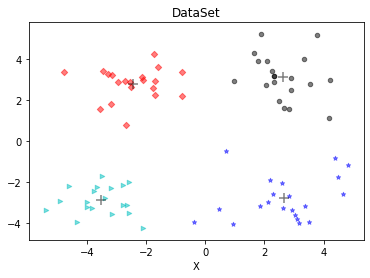

In [7]:
"""
函数说明：绘制数据集

Parameters:
    fileName - 文件名
    
Returns:
    None

Modify:
    2018-08-01
"""
def plotDataSet(filename):
    # 导入数据
    datMat = np.mat(loadDataSet(filename))
    # 进行k-means算法其中k为4
    myCentroids, clustAssing = kMeans(datMat, 4)
    clustAssing = clustAssing.tolist()
    myCentroids = myCentroids.tolist()
    xcord = [[], [], [], []]
    ycord = [[], [], [], []]
    datMat = datMat.tolist()
    m = len(clustAssing)
    for i in range(m):
        if int(clustAssing[i][0]) == 0:
            xcord[0].append(datMat[i][0])
            ycord[0].append(datMat[i][1])
        elif int(clustAssing[i][0]) == 1:
            xcord[1].append(datMat[i][0])
            ycord[1].append(datMat[i][1])
        elif int(clustAssing[i][0]) == 2:
            xcord[2].append(datMat[i][0])
            ycord[2].append(datMat[i][1])
        elif int(clustAssing[i][0]) == 3:
            xcord[3].append(datMat[i][0])
            ycord[3].append(datMat[i][1])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    # 绘制样本点
    ax.scatter(xcord[0], ycord[0], s=20, c='b', marker='*', alpha=.5)
    ax.scatter(xcord[1], ycord[1], s=20, c='r', marker='D', alpha=.5)
    ax.scatter(xcord[2], ycord[2], s=20, c='c', marker='>', alpha=.5)
    ax.scatter(xcord[3], ycord[3], s=20, c='k', marker='o', alpha=.5)
    # 绘制质心
    ax.scatter(myCentroids[0][0], myCentroids[0][1], s=100, c='k', marker='+', alpha=.5)
    ax.scatter(myCentroids[1][0], myCentroids[1][1], s=100, c='k', marker='+', alpha=.5)
    ax.scatter(myCentroids[2][0], myCentroids[2][1], s=100, c='k', marker='+', alpha=.5)
    ax.scatter(myCentroids[3][0], myCentroids[3][1], s=100, c='k', marker='+', alpha=.5)
    plt.title('DataSet')
    plt.xlabel('X')
    plt.show()
plotDataSet('testSet.txt')

# 参考答案

In [13]:
def kMeans1(dataSet, k, distMeas=distEclud, createCent=randCent):
    # 获取数据集样本数
    m = np.shape(dataSet)[0]
    # 初始化一个（m,2）全零矩阵
    clusterAssment = np.mat(np.zeros((m, 2)))
    # 创建初始的k个质心向量
    centroids = createCent(dataSet, k)
    # 聚类结果是否发生变化的布尔类型
    clusterChanged = True
    epoch = 1
    # 只要聚类结果一直发生变化，就一直执行聚类算法，直至所有数据点聚类结果不发生变化
    while clusterChanged:
        # 聚类结果变化布尔类型置为False
        clusterChanged = False
        # 遍历数据集每一个样本向量
        for i in range(m):
            # 初始化最小距离为正无穷，最小距离对应的索引为-1
            minDist = float('inf')
            minIndex = -1
            # 循环k个类的质心
            for j in range(k):
                # 计算数据点到质心的欧氏距离
                distJI = distMeas(centroids[j, :], dataSet[i, :])
                # 如果距离小于当前最小距离
                if distJI < minDist:
                    # 当前距离为最小距离，最小距离对应索引应为j(第j个类)
                    minDist = distJI
                    minIndex = j
            # 当前聚类结果中第i个样本的聚类结果发生变化：布尔值置为True，继续聚类算法
            if clusterAssment[i, 0] != minIndex: 
                clusterChanged = True
            # 更新当前变化样本的聚类结果和平方误差
            clusterAssment[i, :] = minIndex, minDist**2
            # 打印k-means聚类的质心
        # print("epoch: ", epoch, centroids)
        # 遍历每一个质心
        for cent in range(k):
            # 将数据集中所有属于当前质心类的样本通过条件过滤筛选出来
            ptsInClust = dataSet[np.nonzero(clusterAssment[:, 0].A == cent)[0]]
            # 计算这些数据的均值(axis=0:求列均值)，作为该类质心向量
            centroids[cent, :] = np.mean(ptsInClust, axis=0)
        epoch+=1
    # 返回k个聚类，聚类结果及误差
    return centroids, clusterAssment
    

# 问题
发现我们在判断不优化时的条件，仅仅是分组不再变化。<br/>
这一约束条件很可能让我们的簇分类收敛到**局部的最小值**<br/>
想办法把距离也纳入进约束条件中<br/>
## 解决方法1，二分K-均值算法

In [45]:
def biKMeans(dataSet, k, distMeas=distEclud):
    m = np.shape(dataSet)[0] # 得到样本的个数
    clusterAssment = np.mat(np.zeros((m,2)))
    # 初始的簇中心
    centroid0 = np.mean(dataSet, axis=0).tolist()[0]
    centList = [centroid0]
    for j in range(m):
        clusterAssment[j, 1] = distMeas(np.mat(centroid0), dataSet[j, :])**2
    epoch = 1
    print("originally: ")
    print(centList)
    while len(centList) < k:
        print("epoch: ",epoch)
        lowestSSE = np.float('inf')
        for i in range(len(centList)):
            ptsInCurrCluster = dataSet[np.nonzero(clusterAssment[:, 0] == i)[0], :]
            centroidMat, splitClustAss = kMeans(ptsInCurrCluster, 2)
            sseSplit = np.sum(splitClustAss[:, 1])
            sseNoSplit = np.sum(clusterAssment[np.nonzero(clusterAssment[:, 0].A != i)[0], 1])
            print("sseSplit and sseNoSplit: ", sseSplit, sseNoSplit)
            if (sseSplit + sseNoSplit) < lowestSSE:
                bestCentToSplit = i
                bestNewCents = centroidMat
                bestClustAss = splitClustAss.copy()
                lowestSSE = sseSplit + sseNoSplit
            bestClustAss[np.nonzero(bestClustAss[:, 0].A == 1), 0] = len(centList)
            bestClustAss[np.nonzero(bestClustAss[:, 0].A == 0), 0] = bestCentToSplit
            centList[bestCentToSplit] = bestNewCents[0, :].tolist()[0]
            centList.append(bestNewCents[1,:].tolist()[0])
            clusterAssment[np.nonzero(clusterAssment[:, 0].A == bestCentToSplit)[0], :] = bestClustAss
        epoch+=1
        print(centList)
    return np.mat(centList), clusterAssment

originally: 
[[-0.10361321250000004, 0.05430119999999998]]
epoch:  1
sseSplit and sseNoSplit:  248.1507528392998 0.0
[[2.7147303750000007, 0.18858277500000004], [-2.9219568000000002, -0.07998037500000002]]
epoch:  2
sseSplit and sseNoSplit:  50.758498519520835 122.41175887898062
sseSplit and sseNoSplit:  42.815856254279765 50.758498519520835
[[2.6265298999999995, 3.10868015], [-2.46154315, 2.7873755500000006], [2.80293085, -2.7315145999999997], [-3.38237045, -2.9473363000000004]]


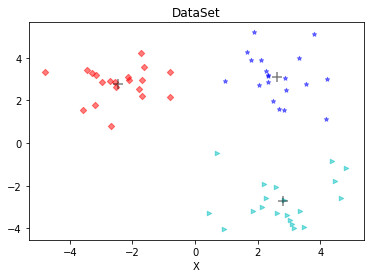

In [52]:
datMat = dataMat
k=3
centList, clusterAssment = biKMeans(datMat, k)
clusterAssment = clusterAssment.tolist()
xcord = [[], [], []]
ycord = [[], [], []]
datMat = datMat.tolist()
m = len(clusterAssment)
for i in range(m):
    if int(clusterAssment[i][0]) == 0:
        xcord[0].append(datMat[i][0])
        ycord[0].append(datMat[i][1])
    elif int(clusterAssment[i][0]) == 1:
        xcord[1].append(datMat[i][0])
        ycord[1].append(datMat[i][1])
    elif int(clusterAssment[i][0]) == 2:
        xcord[2].append(datMat[i][0])
        ycord[2].append(datMat[i][1])
fig = plt.figure()
ax = fig.add_subplot(111)
# 绘制样本点
ax.scatter(xcord[0], ycord[0], s=20, c='b', marker='*', alpha=.5)
ax.scatter(xcord[1], ycord[1], s=20, c='r', marker='D', alpha=.5)
ax.scatter(xcord[2], ycord[2], s=20, c='c', marker='>', alpha=.5)
# 绘制质心
for i in range(k):
    ax.scatter(centList[i].tolist()[0][0], centList[i].tolist()[0][1], s=100, c='k', marker='+', alpha=.5)
# ax.scatter(centList[0].tolist()[0][0], centList[0].tolist()[0][1], s=100, c='k', marker='+', alpha=.5)
# ax.scatter(centList[1].tolist()[0][0], centList[1].tolist()[0][1], s=100, c='k', marker='+', alpha=.5)
# ax.scatter(centList[2].tolist()[0][0], centList[2].tolist()[0][1], s=100, c='k', marker='+', alpha=.5)
plt.title('DataSet')
plt.xlabel('X')
plt.show()